In [1]:
import pandas as pd
import pickle
import copy
import matplotlib.pyplot as plt

# Leitura e pré-processamento dos dados para a criação da matrix de localização

In [2]:
df = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main_full.csv', index_col=False)
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [3]:
def classe_sjdr(i):
    if (i.startswith('SJDR')) | (i.startswith('TR')):
        return 3
    else:
        return 2

In [5]:
df.dropna(subset=['DATE'], inplace=True)
df['HOUR'] = df['HOUR'].apply(lambda x: str(x))
df['TIME_RANGE'] = [str(x.split(':')[0]) for x in df['HOUR']]

In [6]:
df['TIME_RANGE'] = df['TIME_RANGE'].apply(lambda x: int(x))
df['TIME_RANGE'].unique()

array([17, 15, 16, 22, 19, 13, 20, 14,  9,  8, 11, 21, 18, 12, 10, 23,  5,
        6,  7,  0,  2,  1,  4,  3])

In [7]:
df.loc[(df['DAY_OF_WEEK'] == 'Saturday') | (df['DAY_OF_WEEK'] == 'Sunday'), 'TIME_RANGE'] = df['TIME_RANGE'] + 24

In [8]:
df['CLASSE'] = df['PRESUMED_RESIDENCE'].map(classe_sjdr)
df

,DATE,HOUR,DURATION,DDD_USER_FROM,USER_FROM,DDD_USER_TO,USER_TO,ANTENNA,8,9,10,11,12,13,14,DAY_OF_WEEK,ANTENNA_ID,PRESUMED_RESIDENCE,TIME_RANGE,CLASSE
0,2013-04-03,17:09:03,0.80,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,FFA5E22189ED7ADEB364CFEB18205B59,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,17,3
1,2013-04-09,15:34:30,5.12,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,CCA21FFF10C7EC088827F5D5770D3274,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,15,3
2,2013-04-09,15:23:38,1.53,83.0,00003F26576D1122848B6F3CEEC250E5,-4.0,64142FC9CDA8A82085271FB9D25FCDBF,50141.0,NaN,299.0,SERVICO NAO GEOGRAFICO,OI,TNL,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,15,3
3,2013-04-10,16:26:16,0.35,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,BD288CE0AB2A0B5E57EB635FBF814C80,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,16,3
4,2013-04-12,22:47:37,0.07,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,8BA3ED7CA5B5E5D556AF30AE93D578FD,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Friday,SJDR5,SJDR5,22,3
5,2013-04-13,19:53:04,0.87,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,73DBAC87ED341B9B1C0E9DC785C78821,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Saturday,SJDR5,SJDR5,43,3
6,2013-04-13,13:57:49,0.38,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,65DE41CBC83929E9E926C2DD922D5F5B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Saturday,SJDR5,SJDR5,37,3
7,2013-04-14,20:54:33,0.12,83.0,00003F26576D1122848B6F3CEEC250E5,21.0,A49BA005920B8BA24BEE40F455B69B9B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Sunday,SJDR5,SJDR5,44,3
8,2013-04-14,20:57:52,4.85,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,65DE41CBC83929E9E926C2DD922D5F5B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Sunday,SJDR5,SJDR5,44,3
9,2013-04-15,14:58:32,1.30,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,65DE41CBC83929E9E926C2DD922D5F5B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Monday,SJDR5,SJDR5,14,3


In [9]:
df_2 = df.loc[df['CLASSE'] == 2]
df_3 = df.loc[df['CLASSE'] == 3]

In [10]:
df_reduced = df[['USER_FROM', 'ANTENNA_ID', 'TIME_RANGE']]
df_reduced_2 = df_2[['USER_FROM', 'ANTENNA_ID', 'TIME_RANGE']]
df_reduced_3 = df_3[['USER_FROM', 'ANTENNA_ID', 'TIME_RANGE']]

# Criação da matrix de localização

In [11]:
location_matrix = df_reduced.groupby([*df_reduced.columns]).size()
location_matrix = location_matrix.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

location_matrix_2 = df_reduced_2.groupby([*df_reduced_2.columns]).size()
location_matrix_2 = location_matrix_2.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

location_matrix_3 = df_reduced_3.groupby([*df_reduced_3.columns]).size()
location_matrix_3 = location_matrix_3.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

In [12]:
location_matrix_2['TR2'] = 0
location_matrix_2

ANTENNA_ID                                   LD1  MDM  RT  SJDR1  SJDR2  \
USER_FROM                        TIME_RANGE                               
000579E8BA1DA9E5292392473BCCCD2A 0             0    0   0      0      0   
                                 1             0    0   0      0      0   
                                 2             0    0   0      0      0   
                                 3             0    0   0      0      0   
                                 4             0    0   0      0      0   
                                 5             0    0   0      0      0   
                                 6             0    0   0      0      0   
                                 7             0    0   0      0      0   
                                 8             1    0   0      0      0   
                                 9             0    0   0      0      0   
                                 10            1    0   0      0      0   
                                 11            0    0   0      0      0   
                                 12            1    0   0      0      0   
                                 13            4    0   0      0      0   
                                 14            3    0   0      0      0   
                                 15            0    0   0      0      0   
                                 16            0    0   0      0      0   
                                 17            0    0   0      0      0   
                                 18            0    0   0      0      1   
                                 19            0    0   0      0      0   
                                 20            3    0   0      0      0   
                                 21            2    0   0      0      0   
                                 22            0    0   0      0      0   
                                 23            0    0   0      0      0   
                                 24            0    0   0      0      0   
                                 25            0    0   0      0      0   
                                 26            0    0   0      0      0   
                                 27            0    0   0      0      0   
                                 28            0    0   0      0      0   
                                 29            0    0   0      0      0   
...                                          ...  ...  ..    ...    ...   
FFFF6761884073022FB5DFE1B6F54DE3 18            0    0   0      0      0   
                                 19            0    0   3      0      0   
                                 20            0    0   2      0      0   
                                 21            0    0   2      0      0   
                                 22            0    0   4      0      0   
                                 23            0    0   0      0      0   
                                 24            0    0   0      0      0   
                                 25            0    0   0      0      0   
                                 26            0    0   0      0      0   
                                 27            0    0   0      0      0   
                                 28            0    0   0      0      0   
                                 29            0    0   0      0      0   
                                 30            0    0   0      0      0   
                                 31            0    0   0      0      0   
                                 32            0    0   1      0      0   
                                 33            0    0   0      0      0   
                                 34            0    0   0      0      0   
                                 35            0    0   1      0      0   
                                 36            0    0   0      0      0   
                                 37            0    0   0      0      0   
                         

# Vetores de trajetória

In [13]:
trajectory_vector = location_matrix.groupby(['USER_FROM']).sum()
trajectory_vector_2 = location_matrix_2.groupby(['USER_FROM']).sum()
trajectory_vector_3 = location_matrix_3.groupby(['USER_FROM']).sum()

# Similaridade entre os vetores

In [14]:
import scipy.spatial.distance as ssd
import numpy as np

In [15]:
trajectory_vector_array = trajectory_vector.to_numpy()

In [16]:
trajectory_vector

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
USER_FROM,,,,,,,,,,,,
00003F26576D1122848B6F3CEEC250E5,0,0,0,0,0,0,0,12,0,0,0,0
000579E8BA1DA9E5292392473BCCCD2A,21,0,0,0,1,0,0,1,0,0,0,0
0008962B966EF6C5571DF03F5C786677,0,0,0,3,18,0,0,0,0,0,0,0
0008B7FB336065A53EC31AD06D712E28,0,0,20,0,0,0,0,0,0,0,0,0
0008B8E32E18BF4450B7CAAF0C1CE179,0,0,0,27,0,0,0,0,0,0,0,0
0008B94CADE67ACABE2CB3F8DB477CC5,11,0,0,0,0,0,0,0,0,0,0,0
000A16372A762FD3BB2A59334780CDEA,0,0,0,9,2,0,0,0,0,0,0,0
000B663095EB50650DC40A0D8A23C868,0,0,0,0,0,2,0,0,0,19,0,0
000D1DF8B25B4C1728D16E1510BC72BE,0,0,0,0,0,0,0,22,0,0,0,0


In [17]:
trajectory_vector_3

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
USER_FROM,,,,,,,,,,,,
00003F26576D1122848B6F3CEEC250E5,0,0,0,0,0,0,0,12,0,0,0,0
0008962B966EF6C5571DF03F5C786677,0,0,0,3,18,0,0,0,0,0,0,0
0008B8E32E18BF4450B7CAAF0C1CE179,0,0,0,27,0,0,0,0,0,0,0,0
000A16372A762FD3BB2A59334780CDEA,0,0,0,9,2,0,0,0,0,0,0,0
000D1DF8B25B4C1728D16E1510BC72BE,0,0,0,0,0,0,0,22,0,0,0,0
000DDDA8D62CC0A09B505AA27279CCF8,0,0,0,13,0,0,0,0,0,0,0,0
000FBBADF9577F339DF263FD628D897C,0,0,0,0,0,0,23,0,0,0,0,0
000FEF29098C6C17FDE52CF7B3AD30A1,0,0,0,0,0,48,0,0,0,0,0,0
0014D12E96959533E7BBB4B574635B83,0,0,0,21,0,0,2,0,0,0,0,0


In [18]:
trajectory_vector_2

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
USER_FROM,,,,,,,,,,,,
000579E8BA1DA9E5292392473BCCCD2A,21,0,0,0,1,0,0,1,0,0,0,0
0008B7FB336065A53EC31AD06D712E28,0,0,20,0,0,0,0,0,0,0,0,0
0008B94CADE67ACABE2CB3F8DB477CC5,11,0,0,0,0,0,0,0,0,0,0,0
000B663095EB50650DC40A0D8A23C868,0,0,0,0,0,2,0,0,0,19,0,0
001AB2E37F7F1378CABAB1D424EBD134,0,45,0,0,2,0,0,1,0,0,0,0
001AF9435EA5604F0F4D026DA0589E8C,0,0,23,0,0,0,0,0,0,0,0,0
001BB500FDAE643F9B2121BB19DE198E,0,0,8,0,0,0,0,0,0,0,0,0
001E1CED721CCDD6A200736AED8F7A16,0,44,0,0,0,0,0,0,0,0,0,0
00220A4B9411CABDEB06FDD2120CB41A,0,0,21,0,0,0,0,0,0,0,0,0


In [19]:
file = open('/home/gustavo/Desktop/Mestrado/mestrado_dados/Arquivos_Pickle/dict_edges.pkl', 'rb')
dict_edge = pickle.load(file)

In [20]:
len(dict_edge)

227399

In [21]:
def calculate_cosine_similarity(t_v, dict_edge):
    to_remove_dict = {}
    for key in dict_edge.keys():
        for k in key:
            if k in t_v.index:
                pass
            else:
                to_remove_dict[key] = dict_edge[key]
    tuples = set(dict_edge).difference(to_remove_dict)
    new_dict = {}
    for i in tuples:
        new_dict[i] = dict_edge[i]
    for key, value in zip(new_dict.keys(), new_dict.values()):
        x = t_v.loc[key[0]].to_numpy()
        y = t_v.loc[key[1]].to_numpy()
        cosine = 1 - ssd.cosine(x,y)
        value['Cosine_Similarity'] = cosine
    return new_dict

In [22]:
dt_geral = calculate_cosine_similarity(trajectory_vector, dict_edge)
dt_2 = calculate_cosine_similarity(trajectory_vector_2, dict_edge)
dt_3 = calculate_cosine_similarity(trajectory_vector_3, dict_edge)

In [23]:
t_v_2 = trajectory_vector_2.copy()
t_v_2['class'] = 2

t_v_3 = trajectory_vector_3.copy()
t_v_3['class'] = 3

t_v = t_v_3.append(t_v_2)
t_v

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2,class
USER_FROM,,,,,,,,,,,,,
00003F26576D1122848B6F3CEEC250E5,0,0,0,0,0,0,0,12,0,0,0,0,3
0008962B966EF6C5571DF03F5C786677,0,0,0,3,18,0,0,0,0,0,0,0,3
0008B8E32E18BF4450B7CAAF0C1CE179,0,0,0,27,0,0,0,0,0,0,0,0,3
000A16372A762FD3BB2A59334780CDEA,0,0,0,9,2,0,0,0,0,0,0,0,3
000D1DF8B25B4C1728D16E1510BC72BE,0,0,0,0,0,0,0,22,0,0,0,0,3
000DDDA8D62CC0A09B505AA27279CCF8,0,0,0,13,0,0,0,0,0,0,0,0,3
000FBBADF9577F339DF263FD628D897C,0,0,0,0,0,0,23,0,0,0,0,0,3
000FEF29098C6C17FDE52CF7B3AD30A1,0,0,0,0,0,48,0,0,0,0,0,0,3
0014D12E96959533E7BBB4B574635B83,0,0,0,21,0,0,2,0,0,0,0,0,3


In [24]:
from itertools import chain
def dict_union(*args):
    return dict(chain.from_iterable(d.items() for d in args))

dicts = dict_union(dt_geral, dt_2, dt_3)

In [25]:
for k, v in dicts.items():
    v['class_node_1'] = t_v['class'][list(k)[0]]
    v['class_node_2'] = t_v['class'][list(k)[1]]

In [26]:
df_similarity_num_calls = pd.DataFrame.from_dict(dicts, orient='index').reset_index()
df_similarity_num_calls.rename(columns={'level_0': 'Node_1', 'level_1': 'Node_2'}, inplace=True)
df_similarity_num_calls.sample(5)

,Node_1,Node_2,duration,numcalls,Cosine_Similarity,class_node_1,class_node_2
10262,A7B5C574D58F015AE42EC03F95A0BCE4,20C8C905282E0E48FC9F7CCBB3AFB629,3.78,5,1.0,3,3
10664,AF1817BD63633B1AF2561D1C8C256C64,6DAD6F6E284ADEFDAE28234976A6549C,26.77,16,1.0,2,2
3939,4160AAA721995C531979555AA5A74B52,85BB1DF4DB04AEDEDBEAE237576936D5,2.40,3,1.0,2,2
5046,538B183599167ED15843B709172E249E,C37B873AAC8A60A78FBCD8EE4BFB8095,6.25,4,1.0,2,2
8339,8777DCBF13FC3F19C3615E5CDDDCF27A,2FAAABB63EA80FB1B40FA1069F57152D,4.99,3,1.0,3,3


In [27]:
df_2_and_all = df_similarity_num_calls.loc[df_similarity_num_calls['class_node_1'] == 2]
df_2_and_2 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 2) & 
                                         (df_similarity_num_calls['class_node_2'] == 2)]
df_2_and_3 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 2) & 
                                         (df_similarity_num_calls['class_node_2'] == 3)]

df_3_and_all = df_similarity_num_calls.loc[df_similarity_num_calls['class_node_1'] == 3]
df_3_and_2 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 3) & 
                                         (df_similarity_num_calls['class_node_2'] == 2)]
df_3_and_3 = df_similarity_num_calls.loc[(df_similarity_num_calls['class_node_1'] == 3) & 
                                         (df_similarity_num_calls['class_node_2'] == 3)]

In [28]:
def sort_dataframes(dfs):
    new_df = []
    for df in dfs:
        df = df.groupby(['Cosine_Similarity','numcalls']).first().reset_index()
        df = df.sort_values(by=['numcalls', 'Cosine_Similarity'])
        new_df.append(df)
    return new_df
df = sort_dataframes([df_2_and_2,df_2_and_3,df_2_and_all,df_3_and_2, df_3_and_3, df_3_and_all])

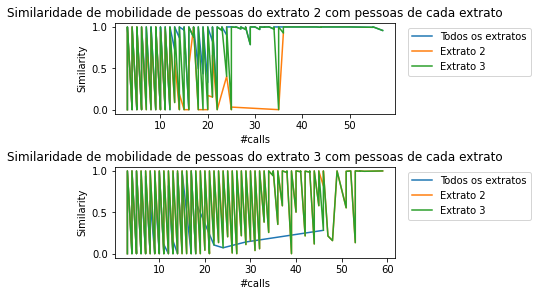

In [42]:
x1 = df[0]['numcalls'].to_numpy()
y1 = df[0]['Cosine_Similarity'].to_numpy()

x2 = df[1]['numcalls'].to_numpy()
y2 = df[1]['Cosine_Similarity'].to_numpy()

x3 = df[2]['numcalls'].to_numpy()
y3 = df[2]['Cosine_Similarity'].to_numpy()

_x1 = df[3]['numcalls'].to_numpy()
_y1 = df[3]['Cosine_Similarity'].to_numpy()

_x2 = df[4]['numcalls'].to_numpy()
_y2 = df[4]['Cosine_Similarity'].to_numpy()

_x3 = df[5]['numcalls'].to_numpy()
_y3 = df[5]['Cosine_Similarity'].to_numpy()

fig, (ax1, ax2) = plt.subplots(2,1, constrained_layout=True)

ax1.plot(x1, y1, label='Todos os extratos')
ax1.plot(x2, y2, label='Extrato 2')
ax1.plot(x3, y3, label='Extrato 3')

ax1.set_xlabel('#calls')
ax1.set_ylabel('Similarity')

ax1.set_title('Similaridade de mobilidade de pessoas do extrato 2 com pessoas de cada extrato')
ax1.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

ax2.plot(_x1, _y1, label='Todos os extratos')
ax2.plot(_x2, _y2, label='Extrato 2')
ax2.plot(_x3, _y3, label='Extrato 3')

ax2.set_xlabel('#calls')
ax2.set_ylabel('Similarity')

ax2.set_title('Similaridade de mobilidade de pessoas do extrato 3 com pessoas de cada extrato')
ax2.legend(loc="upper right", bbox_to_anchor=(1.5, 1))


plt.show()

In [59]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

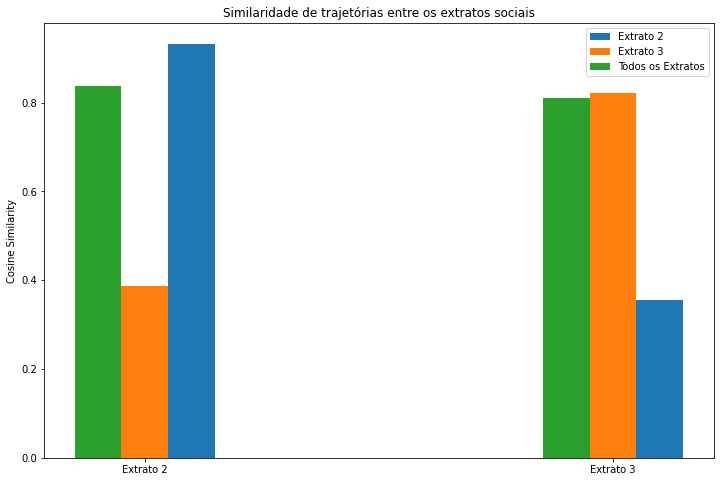

In [66]:
labels = ['Extrato 2', 'Extrato 3']

x = np.arange(len(labels))
width = 1

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x + 0.1, [np.mean(y1), np.mean(_y1)], width/10, label='Extrato 2')
rects2 = ax.bar(x, [np.mean(y2), np.mean(_y2)], width/10, label='Extrato 3')
rects3 = ax.bar(x - 0.1, [np.mean(y3), np.mean(_y3)], width/10, label='Todos os Extratos')

ax.set_ylabel('Cosine Similarity')
ax.set_title('Similaridade de trajetórias entre os extratos sociais')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

In [48]:
np.mean(y2)

0.3871468544349687

In [53]:
df[2]

,Cosine_Similarity,numcalls,Node_1,Node_2,duration,class_node_1,class_node_2
0,0.000000,3,0317452FE3E8A08E788960D9A0FD27CD,201764A14A45D6B8FB2F09A54009C713,6.51,2,3
20,0.007736,3,B16943AD9AB90EF11F1A9C5E4A59B92D,FEE35C717E95335055F1AD8F9E082BAD,0.53,2,3
21,0.011718,3,79D9D852ADDD63B3DF01201DC50CC4C3,67305B27F7BF4AA77491874B74D2DD61,9.45,2,3
22,0.012113,3,E54254CAE6AC0E02845930CB9FCB30CF,AC2D4414CD665619D1E4D40CF75626AD,2.97,2,3
23,0.014846,3,904931EFD4662BCBAF0B9C0A9CB6FE1B,90C01E93E38248889DE1B89800D8627C,1.20,2,2
25,0.017310,3,BF9A83C94C0733A28E56BC730C8E25DE,79ADAA1A560A0B51072B7A58A8AFB246,3.29,2,3
37,0.033315,3,236B0C77B90EB7208D1B189904A26638,FEEBB72CC1C8654DC271A11EA9CE3D11,0.65,2,3
39,0.034462,3,0803087BEA71B8D3599609F0A0CE07B3,3E233EE704B29A2D03713067405A55B9,2.60,2,3
45,0.038433,3,49F451E35719E5B00183D7E1F86E9279,6FB66373BDEFF29D9563382D1EA08CF5,2.82,2,3
49,0.042846,3,B738745C5CF16E3827849FD2B0324562,402C7E5EF1CD111AEF33930055FF41E4,6.92,2,3


In [37]:
len(df[1])

214

In [38]:
len(df[2])

1135

In [39]:
len(df[3])

200

In [40]:
len(df[4])

5399

In [41]:
len(df[5])

5563